In [56]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

In [15]:
df = pd.read_csv('vectorized_data.zip')

In [16]:
df.shape

(176141, 53)

In [17]:
df['Assessment reports Score'].value_counts()

3    91941
4    61151
2    21104
1     1451
5      494
Name: Assessment reports Score, dtype: int64

## Random sampling for grade class imbalance

In [18]:
sample_len = df[df['Assessment reports Score'] == 2].shape[0]

sample_3 = df[df['Assessment reports Score'] == 3].sample(n= sample_len)
sample_4 = df[df['Assessment reports Score'] == 4].sample(n= sample_len)

#concatenate the dataframes
df = pd.concat([df[df['Assessment reports Score'] == 2], sample_3, sample_4], axis=0)

In [19]:
df.columns

Index(['Polls ID', 'Poll Responses Response', 'Assessment reports Hashtag',
       'Assessment reports Score', 'time_stamp', 'tokenized_responses',
       'stemmed_responses', 'clean_responses', 'string', 'LOs/ HCs', 'College',
       'Course', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula',
       'lex_data_prep', 'hdd', 'Summer', 'Dugast', 'words_count',
       'unique_words', 'ttr', 'rttr', 'cttr', 'mtld', 'herdan', 'maas', 'vec',
       'vec_1', 'vec_2', 'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8',
       'vec_9', 'vec_10', 'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15',
       'vec_16', 'vec_17', 'vec_18', 'vec_19', 'vec_20'],
      dtype='object')

In [20]:
# X exclude categorical data
X = df[['time_stamp','flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula', 'hdd', 'Summer', 'Dugast', 'words_count',
       'unique_words', 'ttr', 'rttr', 'cttr', 'mtld', 'herdan', 'maas', 
       'vec_1', 'vec_2', 'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8',
       'vec_9', 'vec_10', 'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15',
       'vec_16', 'vec_17', 'vec_18', 'vec_19', 'vec_20']]
y = df['Assessment reports Score']

In [21]:
len(X.columns)

40

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [23]:
classifier = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [24]:
classifier.fit(X_train, y_train)

/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:41:57] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [25]:
feature_tables = pd.DataFrame(classifier.feature_importances_.reshape(1, -1), columns=X.columns).T
feature_tables 

,0
time_stamp,0.026086
flesch_reading_ease,0.006998
flesch_kincaid_grade,0.028056
gunning_fog,0.006711
smog_index,0.000000
automated_readability_index,0.105581
coleman_liau_index,0.015579
dale_chall_readability_score,0.007533
linsear_write_formula,0.173034
hdd,0.010771


In [26]:
y_pred = classifier.predict(X_test)

In [27]:
mean_squared_error(y_test, y_pred)

0.9878695981804397

In [28]:
import collections, numpy
counter = collections.Counter(y_pred)
counter

Counter({3: 4237, 2: 5391, 4: 6200})

In [29]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 47.16%


In [30]:
train_score = classification_report(y_test, y_pred)
print(train_score)

              precision    recall  f1-score   support

           2       0.51      0.52      0.52      5276
           3       0.42      0.34      0.38      5267
           4       0.47      0.56      0.51      5285

    accuracy                           0.47     15828
   macro avg       0.47      0.47      0.47     15828
weighted avg       0.47      0.47      0.47     15828



## Cross validation

In [57]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(classifier, X, y, cv=kf)

/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:53:32] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:53:41] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:53:50] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:53:59] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:54:08] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
for fold, score in enumerate(scores):
    print(f'Fold {fold+1}: {score:.3f}')

# Print the overall accuracy
print(f'Overall Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Fold 1: 0.477
Fold 2: 0.480
Fold 3: 0.474
Fold 4: 0.477
Fold 5: 0.483
Overall Accuracy: 0.478 (+/- 0.006)


## PCA

### Apply feature scaling 

In [31]:
# copying the data
X_copy = X.copy()
columns = X_copy.columns

In [32]:
# Apply feature scaling 
scaler = StandardScaler()
X_copy = scaler.fit_transform(X_copy)
X_copy = pd.DataFrame(X_copy, columns= columns)
X_copy.head()

,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,hdd,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
0,-1.596953,1.692059,-1.725070,-2.095554,0.0,-0.857427,0.998176,0.099216,-1.720492,0.698806,...,1.450462,0.978348,-0.084741,0.265586,2.482817,0.379154,1.026418,0.599260,0.705896,-0.734325
1,-1.596953,0.807684,-1.266055,-1.763534,0.0,-0.950987,0.779183,-0.290734,-1.461615,-0.157322,...,1.188844,0.946395,1.271459,0.066923,1.361683,-0.711769,1.062770,2.138444,1.553170,1.232829
2,-1.596953,1.620975,-2.044384,-1.715818,0.0,-1.761843,-0.074889,-0.609785,-1.785212,0.627853,...,1.006205,-0.318860,-0.030243,-0.682117,0.615663,-1.737447,-0.013201,-0.422001,1.548225,0.048996
3,-1.596953,2.293142,-2.204041,-1.956384,0.0,-1.746249,-0.800694,-1.880077,-1.655773,0.774621,...,0.482156,0.340895,-0.494812,-1.396442,-0.621225,-2.132962,0.530152,-1.646461,0.654582,-0.617157
4,-1.596732,1.108225,-0.866913,-0.994122,0.0,-0.545559,-0.253212,0.311916,-0.749701,0.240507,...,0.401158,-0.000493,-0.975201,-0.607578,0.612509,-0.497865,1.009867,1.907690,0.619216,-0.752230


Text(0.5, 1.0, 'PCA cumulative explained variance')

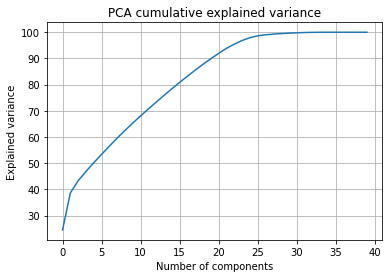

In [33]:
import numpy as np
from sklearn.decomposition import PCA
# Use 100 components to see explained variance 
pca_40 = PCA(n_components = 40)
pca_40.fit(X_copy)

plt.grid()
plt.plot(np.cumsum(pca_40.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('PCA cumulative explained variance')

In [34]:
#Explained variance ratio with numbers of components

import pandas as pd
explained_var = np.cumsum(pca_40.explained_variance_ratio_ * 100).reshape(-1, 1)
num_comps = [i+1 for i in range(40)]
explained_var
explained_var_df = pd.DataFrame(explained_var,index=num_comps, columns = ['Explained Variance Ratio'])
explained_var_df

,Explained Variance Ratio
1,24.515473
2,38.650444
3,43.271251
4,46.835959
5,50.177600
6,53.359970
7,56.480879
8,59.590596
9,62.502019
10,65.329627


In [35]:
def pca_results(full_dataset, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    
    #use the number of componenets to create dimensions 
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # use PCA components to create a dataframe: columns = variables, rows = component values
    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.columns)
    components.index = dimensions#change index to dimensions 
    
    # PCA explained variance 
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    #make explained variance into a column format
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    return pd.concat([variance_ratios, components], axis = 1) #put explained variance and component df together 


def pca_plot(pca_results_df , nth_component):
    
    explain_variance = pca_results_df['Explained Variance'][:nth_component]
    accu_explain_variance = np.round(explain_variance.sum(),4)

    
    sort_comp = pca_results_df.iloc[nth_component-1, 1:].sort_values()
    head = sort_comp[:5]  #largest five variables in a component
    tail = sort_comp[-5:] #smallest five variables in a component
    components = pd.concat([head, tail])
    
    # Plot the components 
    components.plot(kind='bar', title='Component ' + str(nth_component), color = 'c')
    ax = plt.gca()
    ax.grid(linewidth='0.5', alpha=0.5)

    plt.show()
    print('Accumulative explained varaince for Component',nth_component,'is',accu_explain_variance)
    return components

In [36]:
pca_results_40 = pca_results(X, pca_40)
pca_results_40

,Explained Variance,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
Dimension 1,0.2452,-0.0263,0.2273,-0.2412,-0.2384,-0.0000,-0.2502,-0.1742,-0.1940,-0.2260,...,0.0287,-0.0336,0.0058,0.0312,-0.0061,-0.0394,0.0360,0.0442,-0.0956,0.0206
Dimension 2,0.1413,0.1101,-0.1848,0.2671,0.2578,0.0000,0.2491,-0.0079,-0.0866,0.2836,...,-0.0171,-0.0184,-0.0115,0.0140,-0.0092,0.0249,-0.0244,0.0090,-0.0134,0.0105
Dimension 3,0.0462,-0.0338,-0.3190,0.0824,0.0079,-0.0000,0.0528,0.4569,0.3410,-0.0169,...,-0.1069,0.3589,0.0171,0.1188,0.0633,0.0640,-0.1618,-0.0946,0.0016,-0.2012
Dimension 4,0.0356,0.0098,0.0193,0.0037,0.0057,-0.0000,-0.0099,-0.0782,0.0228,0.0016,...,-0.1885,-0.1752,0.3602,0.2977,-0.0419,0.2398,-0.0691,0.1798,-0.2299,0.0484
Dimension 5,0.0334,0.0391,0.0134,-0.0139,-0.0147,0.0000,-0.0079,0.0039,0.0328,-0.0175,...,-0.0653,0.1292,-0.0340,-0.0667,-0.0251,0.3403,-0.2853,0.0399,0.2686,-0.1114
Dimension 6,0.0318,-0.3667,0.0316,-0.0083,0.0076,-0.0000,0.0226,0.0280,-0.1110,0.0147,...,0.1643,0.0636,-0.1441,-0.1154,-0.0112,-0.3910,0.0033,-0.4248,-0.1297,0.0345
Dimension 7,0.0312,-0.0437,0.0256,-0.0359,-0.0396,-0.0000,0.0007,0.0872,-0.0896,-0.0334,...,0.1856,0.1044,-0.0499,-0.1705,0.6706,0.0230,0.0906,0.0530,0.3677,0.1472
Dimension 8,0.0311,-0.0285,-0.0280,0.0068,0.0072,-0.0000,-0.0053,0.0181,-0.0698,0.0048,...,0.2140,-0.2221,-0.3346,0.1434,0.1533,0.0617,-0.1969,0.3432,0.1077,-0.1567
Dimension 9,0.0291,-0.2030,0.0107,-0.0065,-0.0127,0.0000,-0.0009,0.0020,0.0008,-0.0053,...,-0.2278,0.2214,0.1215,-0.1419,0.0381,-0.1672,-0.0072,0.2995,0.0830,0.2999
Dimension 10,0.0283,0.1656,0.0704,0.0024,0.0463,0.0000,-0.0193,-0.2016,0.0441,0.0398,...,-0.2863,-0.2786,-0.0575,0.0403,0.4312,-0.2666,-0.2137,-0.0579,-0.0664,-0.4919


In [37]:
pca_results_40.iloc[0]

Explained Variance              0.2452
time_stamp                     -0.0263
flesch_reading_ease             0.2273
flesch_kincaid_grade           -0.2412
gunning_fog                    -0.2384
smog_index                     -0.0000
automated_readability_index    -0.2502
coleman_liau_index             -0.1742
dale_chall_readability_score   -0.1940
linsear_write_formula          -0.2260
hdd                            -0.2628
Summer                         -0.2254
Dugast                         -0.1533
words_count                    -0.1931
unique_words                   -0.2738
ttr                            -0.1300
rttr                           -0.3060
cttr                           -0.3060
mtld                           -0.2408
herdan                         -0.1988
maas                            0.2401
vec_1                           0.0437
vec_2                           0.0013
vec_3                           0.0254
vec_4                          -0.0289
vec_5                    

In [38]:
#Reapply PCA with 25 components
pca_25 = PCA(25)
pca_features_25 = pca_25.fit_transform(X_copy)

In [39]:
print(pca_features_25.shape)
print(np.cumsum(pca_25.explained_variance_ratio_))

(63312, 25)
[0.24515473 0.38650444 0.43271251 0.46835959 0.501776   0.5335997
 0.56480879 0.59590596 0.62502019 0.65329627 0.68050771 0.70708764
 0.73316103 0.75873366 0.78398189 0.80836616 0.83214183 0.85530482
 0.87767296 0.89877071 0.91920702 0.93856052 0.95432513 0.96848574
 0.97919833]


Text(0.5, 1.0, 'PCA cumulative explained variance')

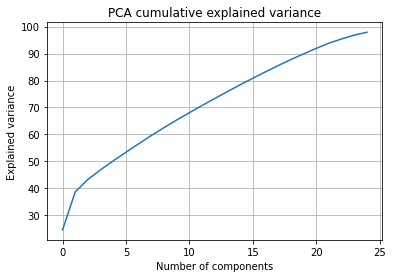

In [40]:
plt.grid()
plt.plot(np.cumsum(pca_25.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('PCA cumulative explained variance')


In [41]:
pca_features_25

array([[ 0.2839584 , -5.33943015,  0.0552843 , ..., -0.132719  ,
         0.04802234, -0.32167151],
       [ 3.19228009, -2.64028087,  1.03357164, ..., -0.98060404,
         0.15742855, -0.02915832],
       [ 1.87933733, -5.45443328, -0.1569571 , ...,  0.39281582,
        -0.17995161,  0.04720293],
       ...,
       [ 0.47750769,  0.76052063, -0.97294593, ...,  0.4438691 ,
        -1.16608724,  0.01393061],
       [-3.22893085,  1.15358898,  1.83161439, ...,  0.25365104,
        -0.43995435, -0.40868611],
       [-2.43674833,  0.73486992,  0.05392712, ...,  0.69161735,
        -1.07715057,  0.71212059]])

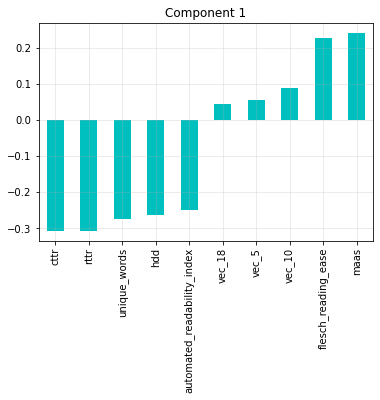

Accumulative explained varaince for Component 1 is 0.2452


cttr                          -0.3060
rttr                          -0.3060
unique_words                  -0.2738
hdd                           -0.2628
automated_readability_index   -0.2502
vec_18                         0.0442
vec_5                          0.0544
vec_10                         0.0889
flesch_reading_ease            0.2273
maas                           0.2401
Name: Dimension 1, dtype: float64

In [42]:
pca_results_25 = pca_results(X, pca_25)
pca_results_25
pca_plot(pca_results_25, 1)

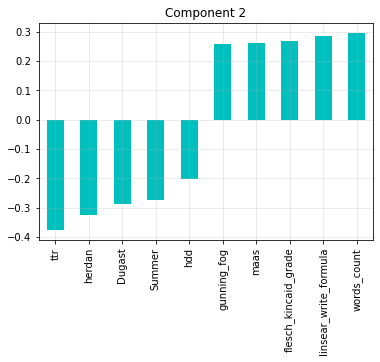

Accumulative explained varaince for Component 2 is 0.3865


ttr                     -0.3777
herdan                  -0.3248
Dugast                  -0.2871
Summer                  -0.2726
hdd                     -0.2016
gunning_fog              0.2578
maas                     0.2615
flesch_kincaid_grade     0.2671
linsear_write_formula    0.2836
words_count              0.2960
Name: Dimension 2, dtype: float64

In [43]:
pca_plot(pca_results_25, 2)

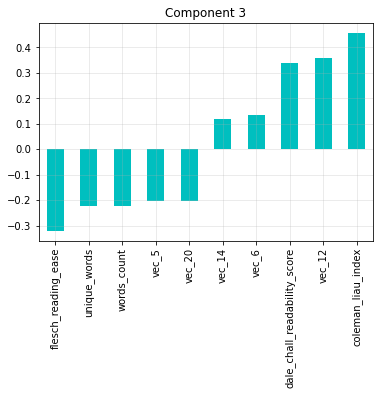

Accumulative explained varaince for Component 3 is 0.4327


flesch_reading_ease            -0.3190
unique_words                   -0.2231
words_count                    -0.2226
vec_5                          -0.2028
vec_20                         -0.2012
vec_14                          0.1188
vec_6                           0.1333
dale_chall_readability_score    0.3410
vec_12                          0.3589
coleman_liau_index              0.4569
Name: Dimension 3, dtype: float64

In [44]:
pca_plot(pca_results_25, 3)

In [45]:
#train test split
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(pca_features_25, y, test_size=0.20, random_state=123)

In [46]:
classifier_pca = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

classifier_pca.fit(X_train_pca, Y_train_pca)

[09:42:07] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [47]:
y_pred_pca = classifier_pca.predict(X_test_pca)

counter = collections.Counter(y_pred_pca)
counter

Counter({4: 4797, 3: 3597, 2: 4269})

In [48]:
# predictions_pca = [round(value) for value in y_pred_pca]

In [49]:
# evaluate predictions
accuracy = accuracy_score(Y_test_pca, y_pred_pca)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 44.51%


In [50]:
train_score = classification_report(Y_test_pca, y_pred_pca)
print(train_score)

              precision    recall  f1-score   support

           2       0.49      0.50      0.49      4212
           3       0.39      0.34      0.36      4197
           4       0.44      0.50      0.47      4254

    accuracy                           0.45     12663
   macro avg       0.44      0.44      0.44     12663
weighted avg       0.44      0.45      0.44     12663



In [51]:
mean_squared_error(Y_test_pca, y_pred_pca)

1.0398799652530997

## Cross validation

In [59]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(classifier_pca, pca_features_25, y, cv=kf)

/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:56:33] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:56:41] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:56:49] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:56:56] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/swimmingcircle/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:57:04] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [60]:
for fold, score in enumerate(scores):
    print(f'Fold {fold+1}: {score:.3f}')

# Print the overall accuracy
print(f'Overall Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Fold 1: 0.451
Fold 2: 0.452
Fold 3: 0.447
Fold 4: 0.451
Fold 5: 0.459
Overall Accuracy: 0.452 (+/- 0.008)


In [52]:
pca_results_25 = pca_results(X, pca_25)
pca_results_25

,Explained Variance,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
Dimension 1,0.2452,-0.0263,0.2273,-0.2412,-0.2384,0.0,-0.2502,-0.1742,-0.1940,-0.2260,...,0.0287,-0.0336,0.0058,0.0312,-0.0061,-0.0394,0.0360,0.0442,-0.0956,0.0206
Dimension 2,0.1413,0.1101,-0.1848,0.2671,0.2578,0.0,0.2491,-0.0079,-0.0866,0.2836,...,-0.0171,-0.0184,-0.0115,0.0140,-0.0092,0.0249,-0.0244,0.0090,-0.0134,0.0105
Dimension 3,0.0462,-0.0338,-0.3190,0.0824,0.0079,-0.0,0.0528,0.4569,0.3410,-0.0169,...,-0.1069,0.3589,0.0171,0.1188,0.0633,0.0640,-0.1618,-0.0946,0.0016,-0.2012
Dimension 4,0.0356,0.0098,0.0193,0.0037,0.0057,0.0,-0.0099,-0.0782,0.0228,0.0016,...,-0.1885,-0.1752,0.3602,0.2977,-0.0419,0.2398,-0.0691,0.1798,-0.2299,0.0484
Dimension 5,0.0334,0.0391,0.0134,-0.0139,-0.0147,-0.0,-0.0079,0.0039,0.0328,-0.0175,...,-0.0653,0.1292,-0.0340,-0.0667,-0.0251,0.3403,-0.2853,0.0399,0.2686,-0.1114
Dimension 6,0.0318,-0.3667,0.0316,-0.0083,0.0076,0.0,0.0226,0.0280,-0.1110,0.0147,...,0.1643,0.0636,-0.1441,-0.1154,-0.0112,-0.3910,0.0033,-0.4248,-0.1297,0.0345
Dimension 7,0.0312,-0.0437,0.0256,-0.0359,-0.0396,-0.0,0.0007,0.0872,-0.0896,-0.0334,...,0.1856,0.1044,-0.0499,-0.1705,0.6706,0.0230,0.0906,0.0530,0.3677,0.1472
Dimension 8,0.0311,-0.0285,-0.0280,0.0068,0.0072,0.0,-0.0053,0.0181,-0.0698,0.0048,...,0.2140,-0.2221,-0.3346,0.1434,0.1533,0.0617,-0.1969,0.3432,0.1077,-0.1567
Dimension 9,0.0291,-0.2030,0.0107,-0.0065,-0.0127,-0.0,-0.0009,0.0020,0.0008,-0.0053,...,-0.2278,0.2214,0.1215,-0.1419,0.0381,-0.1672,-0.0072,0.2995,0.0830,0.2999
Dimension 10,0.0283,0.1656,0.0704,0.0024,0.0463,0.0,-0.0193,-0.2016,0.0441,0.0398,...,-0.2863,-0.2786,-0.0575,0.0403,0.4312,-0.2666,-0.2137,-0.0579,-0.0664,-0.4919
